<a href="https://colab.research.google.com/github/Nsyksl/Akbank-ML-/blob/main/Akbank_Makine_%C3%96%C4%9Frenimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, RocCurveDisplay #plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.exceptions import ConvergenceWarning

from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [232]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [233]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [234]:
def check_df(dataframe, head=5):
  print("################################### Shape ####################################")
  print(dataframe.shape)
  print("################################### İnfo ####################################")
  print(dataframe.info())
  print("################################### NaN ####################################")
  print(dataframe.isnull().sum())
  print("################################### dtypes ####################################")
  print(dataframe.dtypes)
  print("################################### Head ####################################")
  print(dataframe.head())
  print("################################### Describe ####################################")
  print(dataframe.describe().T)

In [235]:
check_df(df)

################################### Shape ####################################
(34857, 21)
################################### İnfo ####################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea 

In [236]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [237]:
object_col = df.select_dtypes(include='object').columns

for i in object_col:
    df[i] = df[i].astype('category')

In [238]:
for col in df.columns:
  print(f"{col} have {df[col].nunique()} unique values.\n")

Suburb have 351 unique values.

Address have 34009 unique values.

Rooms have 12 unique values.

Type have 3 unique values.

Price have 2871 unique values.

Method have 9 unique values.

SellerG have 388 unique values.

Date have 78 unique values.

Distance have 215 unique values.

Postcode have 211 unique values.

Bedroom2 have 15 unique values.

Bathroom have 11 unique values.

Car have 15 unique values.

Landsize have 1684 unique values.

BuildingArea have 740 unique values.

YearBuilt have 160 unique values.

CouncilArea have 33 unique values.

Lattitude have 13402 unique values.

Longtitude have 14524 unique values.

Regionname have 8 unique values.

Propertycount have 342 unique values.



In [239]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
            Degisken isimleri alinmak istenilen dataframe

        cat_th: int, optional
            Numerik fakat kategorik olan degiskenler için sinif esik degeri

        car_th: int, optional
            Kategorik fakat kardinal degiskenler için sinif esik degeri

    Returns
    ------
        cat_cols: list
            Kategorik degisken listesi

        num_cols: list
            Numerik degisken listesi


    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                  dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                  dataframe[col].dtypes =="O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"Categorical but Cardinal Columns: {len(cat_but_car)}")
    print(f"Numerical but Categorical Columns: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [240]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [241]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, car_th=20)


Observations: 34857
Variables: 21
Categorical Columns: 3
Numerical Columns: 18
Categorical but Cardinal Columns: 0
Numerical but Categorical Columns: 3


In [242]:

def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                      "Ratio" : 100* dataframe[col_name].value_counts() / len(dataframe)}))
  print("###########################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)

    Type  Ratio
h  23980  68.80
u   7297  20.93
t   3580  10.27
###########################
Type None
    Method  Ratio
S    19744  56.64
SP    5095  14.62
PI    4850  13.91
VB    3108   8.92
SN    1317   3.78
PN     308   0.88
SA     226   0.65
W      173   0.50
SS      36   0.10
###########################
Method None
                            Regionname  Ratio
Southern Metropolitan            11839  33.96
Northern Metropolitan             9557  27.42
Western Metropolitan              6799  19.51
Eastern Metropolitan              4377  12.56
South-Eastern Metropolitan        1739   4.99
Eastern Victoria                   228   0.65
Northern Victoria                  203   0.58
Western Victoria                   115   0.33
###########################
Regionname None


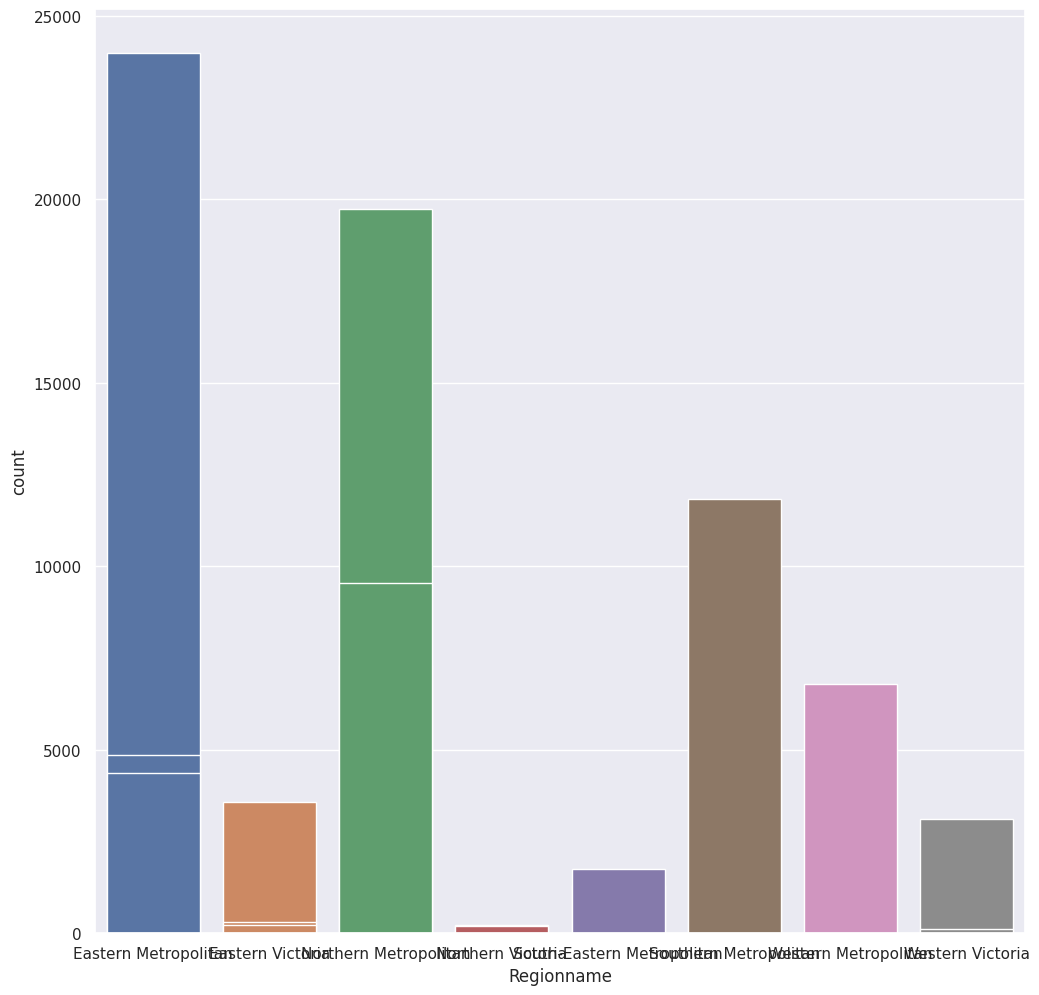

In [243]:
for col in cat_cols:
  print(col, cat_summary(df, col, True))

In [244]:
for col in cat_cols:
    print(f"{col} - have {df[col].nunique()} unique values")

Type - have 3 unique values
Method - have 9 unique values
Regionname - have 8 unique values


In [245]:
for col in num_cols:
    print(f"{col} - have {df[col].nunique()} unique values")

Suburb - have 351 unique values
Address - have 34009 unique values
Rooms - have 12 unique values
Price - have 2871 unique values
SellerG - have 388 unique values
Date - have 78 unique values
Distance - have 215 unique values
Postcode - have 211 unique values
Bedroom2 - have 15 unique values
Bathroom - have 11 unique values
Car - have 15 unique values
Landsize - have 1684 unique values
BuildingArea - have 740 unique values
YearBuilt - have 160 unique values
CouncilArea - have 33 unique values
Lattitude - have 13402 unique values
Longtitude - have 14524 unique values
Propertycount - have 342 unique values


In [246]:
for col in cat_but_car:
    print(f"{col} - have {df[col].nunique()} unique values")

In [247]:
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [248]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)

    interquantile_range = quartile3 - quartile1

    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    return low_limit, up_limit

In [249]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)

    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [250]:
num_cols = [col for col in num_cols if col not in "Price"]

In [251]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [252]:
def num_summary(dataframe, num_cols, plot=False):
  quantiles = [0.05, 0.10, 0.25, 0.50, 0.60, 0.75, 0.90, 0.95, 0.99]
  print(dataframe[num_cols].describe(quantiles).T)


  if plot:
    dataframe[num_cols].hist(bins=20)
    plt.xlabel(num_cols)
    plt.title(num_cols)
    plt.show()

In [254]:
for col in num_cols:
  print(col, num_summary(df, col, True));

count         34857
unique          351
top       Reservoir
freq            844
Name: Suburb, dtype: object


KeyboardInterrupt: ignored

In [255]:
# Hedef değişken kırılımında numerik değişkenlerin analizi
def target_summary_with_num(dataframe, target, num_cols):
  print(dataframe.groupby(target).agg({num_cols : "mean"}), end="\n\n\n")

In [256]:
# Hedef değişken kırılımında kategorik değişkenlerin analizi
def target_summary_with_cat(dataframe, target, cat_cols):
  print(pd.DataFrame({"Target_Mean": dataframe.groupby(cat_cols)[target].mean()}), end="\n\n\n")

In [257]:
for col in cat_cols:
  target_summary_with_cat(df, "Price", col)

      Target_Mean
Type             
h      1065049.55
t       865046.74
u       622628.16


        Target_Mean
Method             
PI        947569.57
PN        600000.00
S        1000492.31
SA        921574.73
SN        600000.00
SP        797314.54
SS        600000.00
VB       1113142.54
W         600000.00


                            Target_Mean
Regionname                             
Eastern Metropolitan          980292.82
Eastern Victoria              683238.96
Northern Metropolitan         815162.76
Northern Victoria             615578.82
South-Eastern Metropolitan    814130.23
Southern Metropolitan        1173092.67
Western Metropolitan          803225.93
Western Victoria              460263.04




<Axes: >

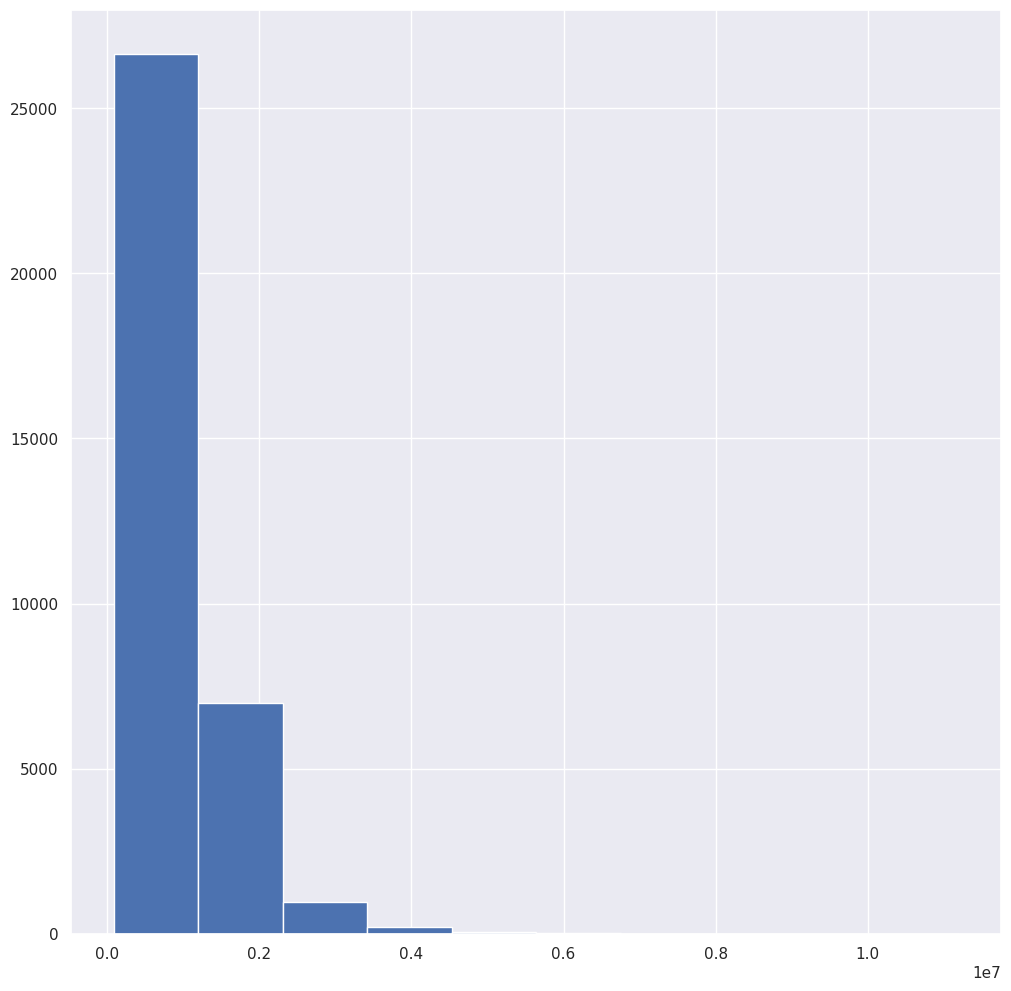

In [258]:
# Bağımlı Değişkenin Analizi

df["Price"].hist()

<Axes: >

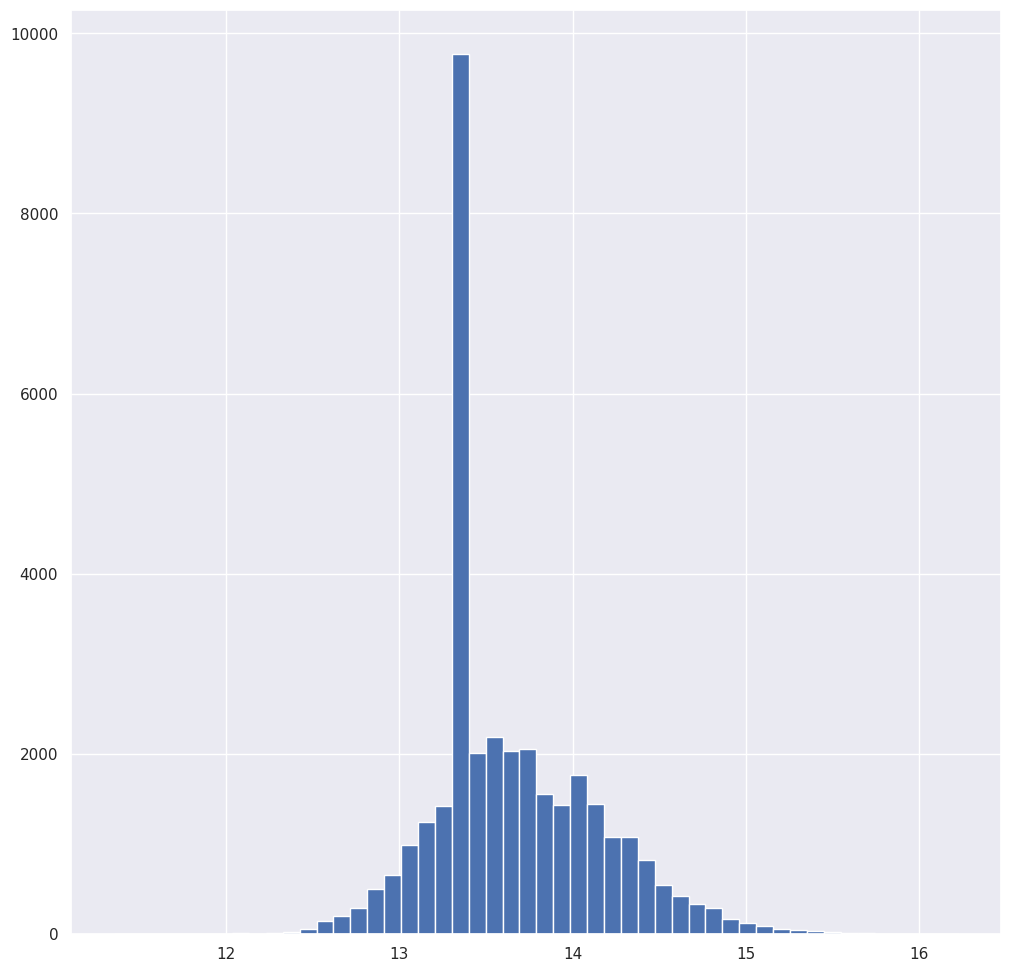

In [259]:
# Bağımlı Değişkenin Logaritmik Analizi

np.log1p(df["Price"]).hist(bins=50)

In [260]:
corr = df[num_cols].corr()
print(corr)


               Rooms  Distance  Postcode  Bedroom2  Bathroom   Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
Rooms           1.00      0.27      0.09      0.82      0.54  0.32      0.04          0.11      -0.02       0.02        0.09          -0.07
Distance        0.27      1.00      0.48      0.24      0.11  0.20      0.04          0.05       0.22      -0.09        0.18          -0.02
Postcode        0.09      0.48      1.00      0.08      0.10  0.06      0.03          0.03       0.06      -0.20        0.33           0.02
Bedroom2        0.82      0.24      0.08      1.00      0.58  0.38      0.04          0.11      -0.00       0.01        0.11          -0.05
Bathroom        0.54      0.11      0.10      0.58      1.00  0.23      0.06          0.12       0.10      -0.00        0.11          -0.04
Car             0.32      0.20      0.06      0.38      0.23  1.00      0.02          0.07       0.10      -0.03        0.04          -0.01
Landsize        0.04

<ipython-input-260-b9d83a9b3caa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[num_cols].corr()


<Axes: >

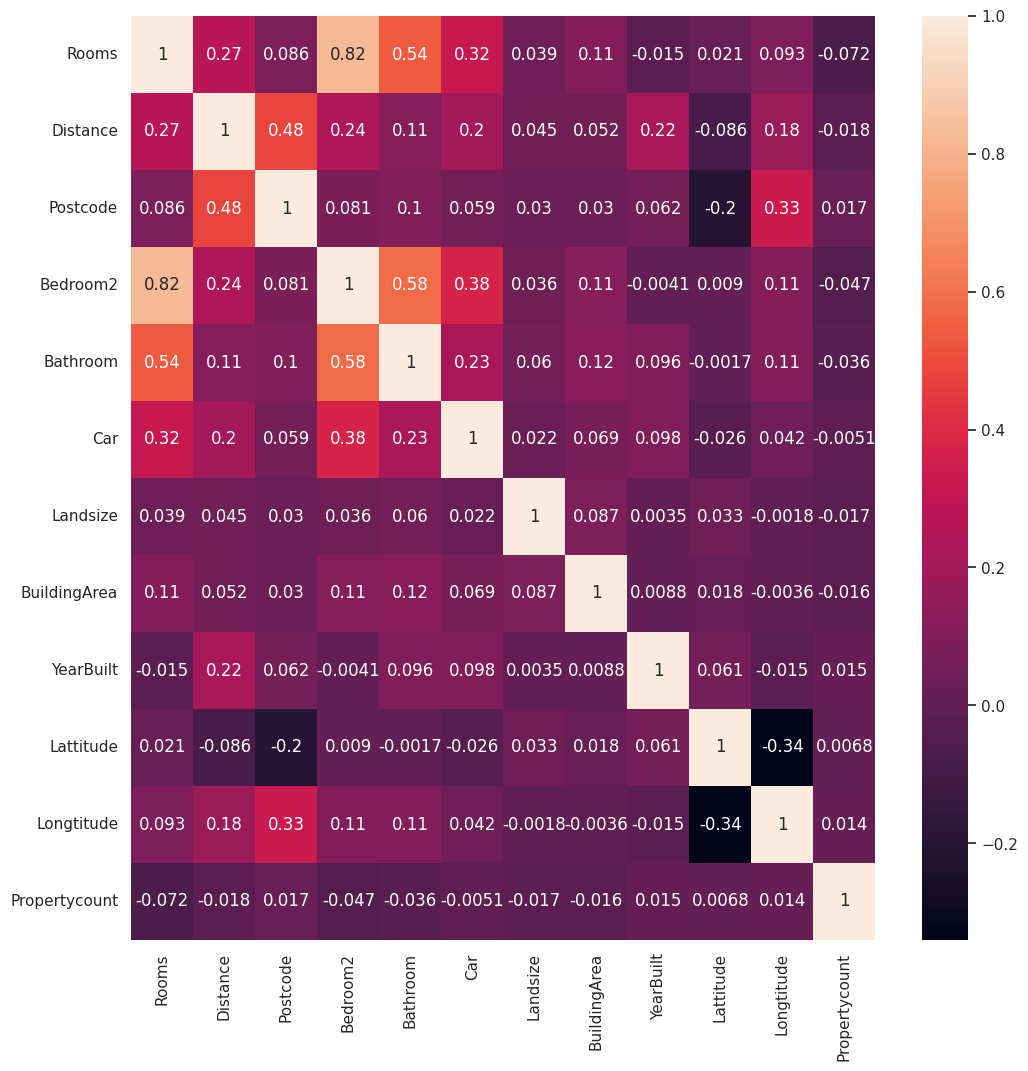

In [261]:
sns.set(rc={"figure.figsize" : (12,12)})

sns.heatmap(corr, annot=True)

In [262]:
def high_corr_cols(dataframe, plot=False, corr_th=0.70):
  corr = dataframe.corr()
  cor_matrix = corr.abs()
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
  if plot:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(rc={"figure.figsize" : (15, 15)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()

  return drop_list

In [263]:
high_corr_cols(df)

<ipython-input-262-dcca315216fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()
<ipython-input-262-dcca315216fc>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['Bedroom2']

In [264]:
# Eşik Değerlerini Belirleyen Fonksiyon
def outlier_treshold(dataframe, col_name, q1=0.05, q3=0.95):
  quantile1 = dataframe[col_name].quantile(q1)
  quantile3 = dataframe[col_name].quantile(q3)
  ıqr = quantile3 - quantile1
  up_limit = quantile3 + 1.5 * ıqr
  low_limit = quantile1 - 1.5 * ıqr
  return low_limit, up_limit


In [265]:
# Aykırı Değerin var olup olmamasını kontrol eden fonksiyon
def check_outlier(dataframe, col_name):
  low, up = outlier_treshold(dataframe, col_name)

  if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low) ].any(axis=None):
    return True
  else :
    return False




In [266]:
for col in num_cols:
  print(col, check_outlier(df, col))

AssertionError: ignored

In [267]:
def replace_with_tresholds(dataframe, col_name):
  low, up = outlier_treshold(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low), col_name] = low
  dataframe.loc[(dataframe[col_name] > up), col_name] = up


In [269]:
for col in num_cols:
  if col != "Price":
    replace_with_tresholds(df, col)

AssertionError: ignored

In [270]:
def missing_value(dataframe, na_name=False):
  nan_cols = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0 ]
  n_miss = dataframe[nan_cols].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[nan_cols].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df)

  if na_name:
    return nan_cols


In [271]:
nan_cols = missing_value(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [272]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="Price"):
  variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]

  temp_target = data[target]
  print("#BEFORE")
  print(data[variables_with_na].isnull().sum(), "\n\n")

  # Değişken object ve sınıf sayısı cat_length eşit veya altındaysa boş değerleri mode ile doldurur

  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

  # num_method = mean ise object olmanları mean ile dolduruyor.

  if num_method=="mean":
    data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)


  elif num_method == "median":
    data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

  data[target] = temp_target

  print("# AFTER \n Imputaion method is MODE for categorical variables")
  print("# AFTER \n Imputaion method is "+ num_method.upper() + " for numeric variables", "\n")
  print(data[variables_with_na].isnull().sum(), "\n\n" )

  return data


In [273]:
df = quick_missing_imp(df)

#BEFORE
Series([], dtype: float64) 




TypeError: ignored

In [274]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                        "ratio": dataframe[col].value_counts() / len(dataframe),
                        "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [275]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()
  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O" and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])


  return temp_df

In [276]:
rare_analyser(df, "Price", cat_cols)

Type : 3
   Count  ratio  Target_Mean
h  23980   0.69   1065049.55
t   3580   0.10    865046.74
u   7297   0.21    622628.16


Method : 9
    Count  ratio  Target_Mean
PI   4850   0.14    947569.57
PN    308   0.01    600000.00
S   19744   0.57   1000492.31
SA    226   0.01    921574.73
SN   1317   0.04    600000.00
SP   5095   0.15    797314.54
SS     36   0.00    600000.00
VB   3108   0.09   1113142.54
W     173   0.00    600000.00


Regionname : 8
                            Count  ratio  Target_Mean
Eastern Metropolitan         4377   0.13    980292.82
Eastern Victoria              228   0.01    683238.96
Northern Metropolitan        9557   0.27    815162.76
Northern Victoria             203   0.01    615578.82
South-Eastern Metropolitan   1739   0.05    814130.23
Southern Metropolitan       11839   0.34   1173092.67
Western Metropolitan         6799   0.20    803225.93
Western Victoria              115   0.00    460263.04




In [277]:
rare_encoder(df, 0.01).tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,120.00,1970.00,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,3.00,1.00,2.00,0.00,120.00,1970.00,Maribyrnong City Council,-37.84,145.00,Western Metropolitan,6543.00
34856,Yarraville,3 Tarrengower St,2,h,1020000.00,PI,RW,24/02/2018,6.30,3013.00,2.00,1.00,0.00,250.00,103.00,1930.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00


In [278]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 34857
Variables: 21
Categorical Columns: 3
Numerical Columns: 18
Categorical but Cardinal Columns: 0
Numerical but Categorical Columns: 3


In [279]:
df.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date             category
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object

In [280]:
for sutun in df.select_dtypes(include='category'):
    encoder = LabelEncoder()
    df[sutun] = encoder.fit_transform(df[sutun])

In [281]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

In [282]:
df = one_hot_encoder(df, cat_cols)

In [283]:
train_df = df[df["Price"].notnull()]
test_df = df[df["Price"].isnull()]


In [284]:
y = train_df["Price"]
X = train_df.drop(["Price"] ,axis=1)


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=17)


In [286]:
models = [#("LR", LogisticRegression()),
          ("KNN", KNeighborsRegressor()),
          ("CART", DecisionTreeRegressor()),
          ("RF", RandomForestRegressor()),
          ("GBM", GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective="reg:squarederror")),
          ("LightGBM", LGBMRegressor())]

In [287]:
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    "LightGBM": {"model" :LGBMRegressor()}
    #'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}
}

In [288]:
for name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'########## {name} ##########')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}\n')

########## Lasso ##########
MAE: 312729.0269
MSE: 247069480858.1983
RMSE: 497060.8422
R2 Score: 0.3614

########## LinearRegression ##########
MAE: 312731.3119
MSE: 247070173179.1336
RMSE: 497061.5386
R2 Score: 0.3614

########## Ridge ##########
MAE: 312706.2567
MSE: 247058014512.0782
RMSE: 497049.3079
R2 Score: 0.3614

########## ElasticNet ##########
MAE: 338913.0740
MSE: 275317752738.6682
RMSE: 524707.3020
R2 Score: 0.2884

########## KNeighborsRegressor ##########
MAE: 395215.9107
MSE: 371975917664.2995
RMSE: 609898.2847
R2 Score: 0.0385

########## RandomForestRegressor ##########
MAE: 249557.0523
MSE: 200238852854.8476
RMSE: 447480.5614
R2 Score: 0.4824

########## GradientBoostingRegressor ##########
MAE: 269381.1664
MSE: 209357129520.8071
RMSE: 457555.6027
R2 Score: 0.4589

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

In [289]:
train_df_ = df[df["Price"].notnull()]
test_df_ = df[df["Price"].isnull()]

y = np.log1p(train_df_["Price"])
X = train_df_.drop(["Price"] ,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=17)


In [290]:
lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 13.629655


In [291]:
y = np.expm1(y)

In [292]:
new_y = np.expm1(y_pred)
new_y

array([ 852862.989334  ,  454713.19126139, 1389822.56883017, ...,
        595607.83617232,  798895.83869241,  809169.55503705])

In [293]:
new_y_test = np.expm1(y_test)
new_y_test

12837   1800000.00
21795    550000.00
33761    600000.00
10776    600000.00
21540    461500.00
           ...    
16407    421000.00
7129    1316000.00
19232    665000.00
29457    600000.00
23424    600000.00
Name: Price, Length: 6972, dtype: float64

In [294]:
np.sqrt(mean_squared_error(new_y_test, new_y))
# Eski
# Yeni 461696.30507321696

461696.30507321696

In [295]:
lgbm_model = LGBMRegressor(random_state=46)
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring= "neg_mean_squared_error")))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2637
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 931907.118164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 961940.611404
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [296]:
lgbm_param = {"learning_rate" : [0.01, 0.1],
              "n_estimators" : [500,1500],
              #"col_sample_bytree" : [0.5, 0.7, 1]
              }

In [297]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_param,
                            cv=5,
                            n_jobs = -1,
                            verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 13.629655


In [298]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X,y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring= "neg_mean_squared_error")))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 34857, number of used features: 34
[LightGBM] [Info] Start training from score 951891.245087
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2637
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 931907.118164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [299]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X,y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring= "neg_mean_squared_error")))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 34857, number of used features: 34
[LightGBM] [Info] Start training from score 951891.245087
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2637
[LightGBM] [Info] Number of data points in the train set: 27885, number of used features: 34
[LightGBM] [Info] Start training from score 931907.118164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [300]:
rmse

431312.31765474565

In [301]:
def plot_importance(model, features, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value" : model.feature_importances_, "Feature" : features.columns })
  plt.figure(figsize= (20,20))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")


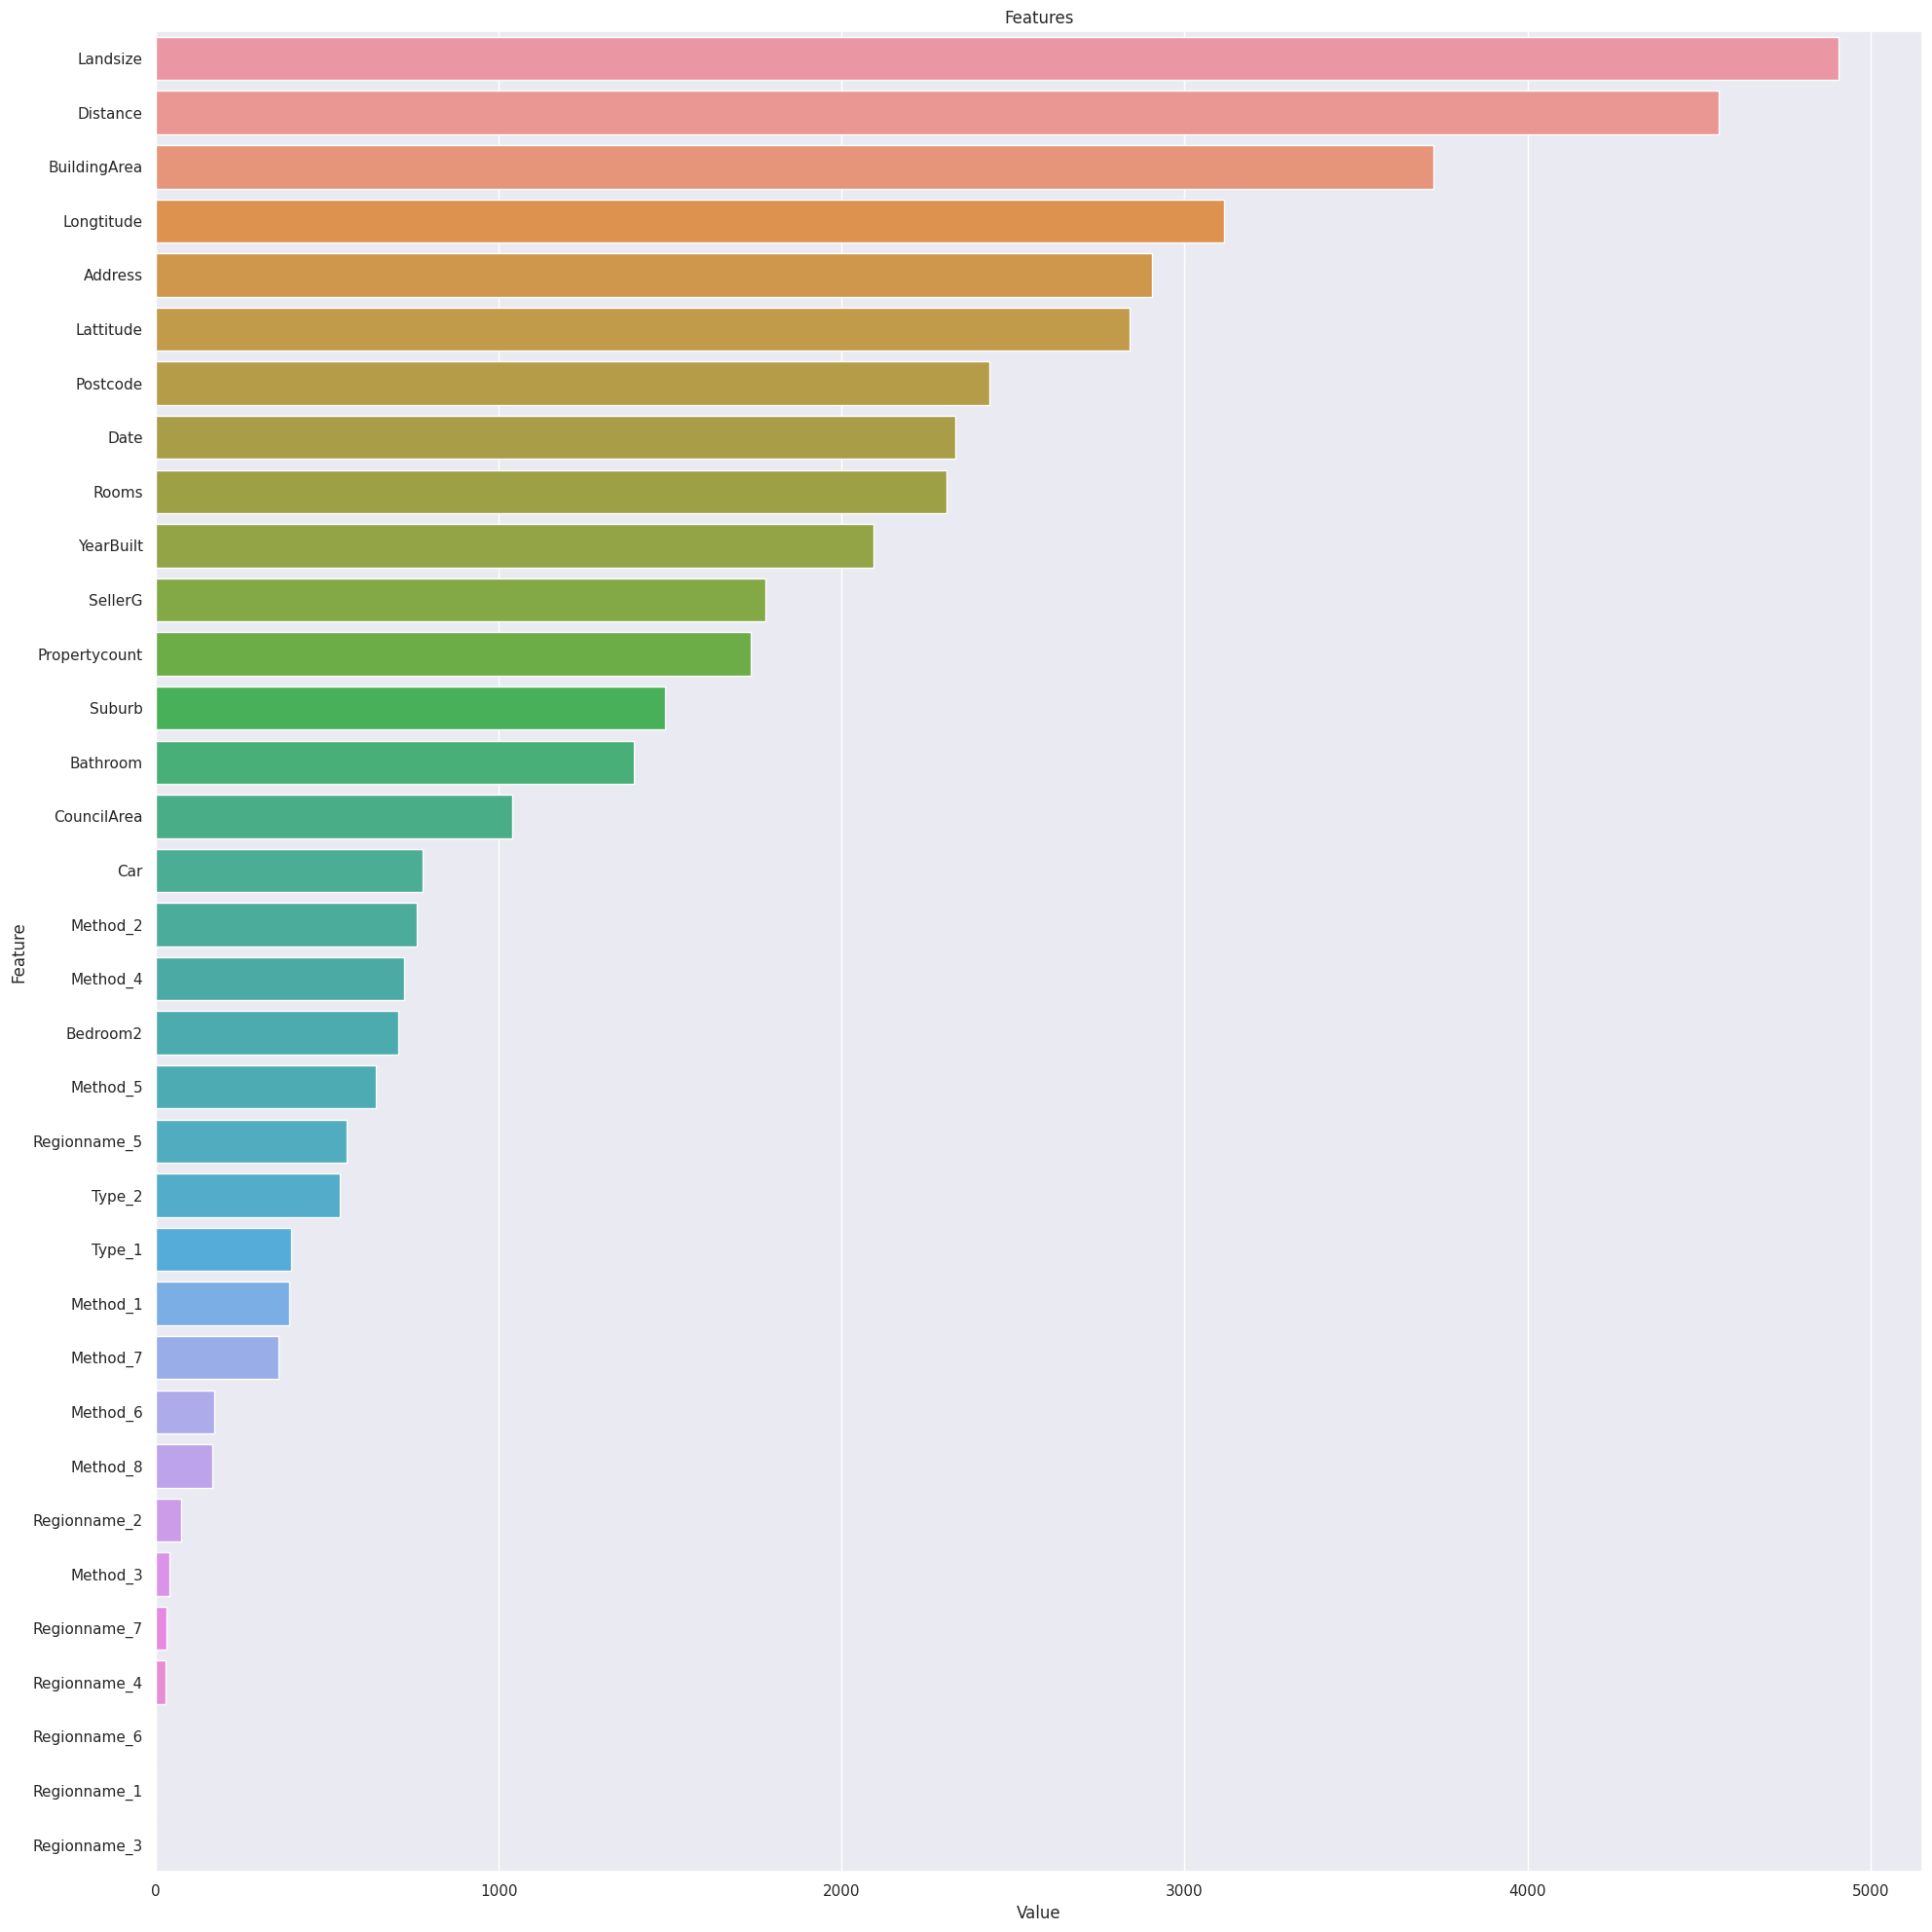

In [302]:
plot_importance(final_model, X)

In [303]:
model = LGBMRegressor()
model.fit(X, y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 34857, number of used features: 34
[LightGBM] [Info] Start training from score 951891.245087


LGBMRegressor()

In [305]:
predictions = model.predict(df.drop([ "Price"], axis=1))
dic = { "Price" : predictions }
dfSubmission = pd.DataFrame(dic)
dfSubmission.to_csv("House_PredictionPrice.csv", index=False)